## World Population Growth Rate is declining

According to a study published in The Lancet: "world population will likely peak in 2064 at around 9.7 billion, and then decline to about 8.8 billion by 2100 -- about 2 billion lower than some previous estimates".

Using world bank data on the population the following analysis indeed confirms declining trend in annual population growth in the world. 

### Liabraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime

import wbdata

import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

print("Libraries required to run this doc: pandas, numpy, plt, seaborn, wbdata, requests, bs4, warnings")

Libraries required to run this doc: pandas, numpy, plt, seaborn, wbdata, requests, bs4, warnings


### Countries

In [4]:
### wbdata.get_country output includes countries and regions in one list
countries_and_regions = wbdata.get_country() 

### the following is the list of all entries but countries in the extracted record
regions = ['Arab World', 
           'Euro area',
           'East Asia & Pacific (IBRD-only countries)',
           'Europe & Central Asia (IBRD-only countries)',
           'IBRD countries classified as high income', 
           'Latin America & the Caribbean (IBRD-only countries)',
           'Middle East & North Africa (IBRD-only countries)',
           'Sub-Saharan Africa (IBRD-only countries)',
           'Sub-Saharan Africa (IFC classification)',
           'East Asia and the Pacific (IFC classification)',
           'Latin America and the Caribbean (IFC classification)',
           'Middle East and North Africa (IFC classification)',
           'South Asia (IFC classification)',
           'East Asia & Pacific (IDA-eligible countries)',
           'Europe & Central Asia (IDA-eligible countries)',
           'IDA countries classified as Fragile Situations',
           'Latin America & the Caribbean (IDA-eligible countries)',
           'Middle East & North Africa (IDA-eligible countries)',
           'IDA countries not classified as Fragile Situations',
           'IDA countries in Sub-Saharan Africa not classified as fragile situations ',
           'South Asia (IDA-eligible countries)',
           'IDA countries in Sub-Saharan Africa classified as fragile situations ',
           'Sub-Saharan Africa (IDA-eligible countries)',
           'Central Europe and the Baltics',
           'Europe and Central Asia (IFC classification)',
           'East Asia & Pacific (excluding high income)',
           'Early-demographic dividend',
           'East Asia & Pacific',
           'Europe & Central Asia (excluding high income)',
           'Europe & Central Asia', 
           'European Union', 
           'Fragile and conflict affected situations', 
           'High income',
           'IDA countries classified as fragile situations, excluding Sub-Saharan Africa',
           'Heavily indebted poor countries (HIPC)',
           'IBRD, including blend',
           'IBRD only',
           'IDA & IBRD total',
           'IDA total',
           'IDA blend',
           'IDA only','Not classified',
           'Latin America & Caribbean (excluding high income)', 
           'Latin America & Caribbean ',
           'Least developed countries: UN classification',
           'Low income', 
           'Lower middle income', 
           'Low & middle income', 
           'Late-demographic dividend', 
           'Middle East (developing only)', 
           'Middle East & North Africa', 
           'Middle East & North Africa (excluding high income)',
           'Middle income',
           'North America', 
           'North Africa', 
           'Non-resource rich Sub-Saharan Africa countries', 
           'IDA countries not classified as fragile situations, excluding Sub-Saharan Africa',
           'OECD members', 
           'Other small states', 
           'Pre-demographic dividend', 
           'Pacific island small states',
           'Post-demographic dividend', 
           'Resource rich Sub-Saharan Africa countries', 
           'South Asia',
           'Sub-Saharan Africa (excluding high income)', 
           'Sub-Saharan Africa ',
           'Small states', 'Sint Maarten (Dutch part)',
           'Sub-Saharan Africa excluding South Africa',
           'East Asia & Pacific (IDA & IBRD countries)',
           'Europe & Central Asia (IDA & IBRD countries)',
           'Latin America & the Caribbean (IDA & IBRD countries)',
           'Middle East & North Africa (IDA & IBRD countries)',
           'South Asia (IDA & IBRD)',
           'Sub-Saharan Africa (IDA & IBRD countries)',
           'Upper middle income', 
           #'World',
           'Sub-Saharan Africa excluding South Africa and Nigeria',
           'Caribbean small states',
          ]

### will filter list to exclude regions and save filtered list as countries
countries = []

for i in range(len(countries_and_regions)):
    if countries_and_regions[i]['name'] not in regions:
        countries.append(countries_and_regions[i]['name'])

In [5]:
print(f"There are {len(countries)} countries in the list and the world")

There are 219 countries in the list and the world


In [6]:
### To separate countries by geopgraphy and income levels, will scrape another list from data.worldbank.org

### scrape data for regions
#headers = {'User-Agent': your user agent} #uncomment
base_url = "https://data.worldbank.org"

regions = requests.get(base_url + '/' + 'country', headers=headers, timeout=3)
print("Status code: ", regions.status_code)

regions_content = regions.content
regions_soup = BeautifulSoup(regions_content, 'html')
links = regions_soup.find_all('li', class_='overview-list-item')
    
regions_url = []

for l in range(len(links)):
    link = base_url + links[l].find('a')['href']
    regions_url.append(link)
    
regions_countries = {}

for url in regions_url:
    html = requests.get(url, headers=headers, timeout=3)
    content = html.content
    soup = BeautifulSoup(content, 'html')
    
    labels = []
    
    lists = soup.find_all('li', class_ = 'label')
    
    for l in range(len(lists)):
        region_countries = lists[l].get_text()
        labels.append(region_countries)
        region = url.replace(base_url,'').replace('/region/','').replace('/income-level/','').replace('?view=chart','')
        regions_countries[region]=labels

Status code:  200


In [7]:
#for key, v in  regions_countries.items():
    #print(key)

In [8]:
geography = ['east-asia-and-pacific',
             'europe-and-central-asia',
             'latin-america-and-caribbean', 
             'middle-east-and-north-africa', 
             'north-america', 
             'south-asia', 
             'sub-saharan-africa']
geographical_regions = {k: v for k, v in regions_countries.items() if k in geography}


income_levels = ['high-income', 
                 'low-income',
                 'middle-income']
income_regions = {k: v for k, v in regions_countries.items() if k in income_levels}

### Helper functions

In [9]:
def define_region(country):
    for key in geographical_regions.keys():
        for value in geographical_regions[key]:
            if country in value:
                return key
            
def define_income_region(country):
    for key in income_regions.keys():
        for value in income_regions[key]:
            if country in value:
                return key

def get_data(indicator, start, end):
    data_date = (datetime.datetime(start,1,1), datetime.datetime(end,1,1))
    data = wbdata.get_data(indicator, data_date=data_date)
    
    # convert to df
    df = pd.DataFrame(data)[['date', 'country', 'value']]
    df['country'] = df['country'].apply(lambda x: x['value'])
    # filter out regions from countries column
    df = df[df['country'].isin(countries)]
    # add region as a column
    df['region'] = df['country'].apply(lambda x: define_region(x))
    # add income level as a column
    df['income_level'] = df['country'].apply(lambda x: define_income_region(x))
    # rename value column by name of indicator
    indicator_for = data[0]['indicator']['value'].replace(' ','_').replace(',','')
    df.columns = ['year', 'country', indicator_for, 'region', 'income_level']
    # convert year to date format
    df['year'] = pd.to_datetime(df['year']).apply(lambda x: x.strftime('%Y')) 
    
    # convert to list for db
    data_list = []
    for i in range(len(data)):
        if data[i]['country']['value'] in countries:
            data_list.append((data[i]['date'],
                              data[i]['country']['value'], 
                              define_region(data[i]['country']['value']),
                              define_income_region(data[i]['country']['value']),
                              data[i]['value']))
            
    return df, data_list

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(s):
    '''
    highlight the minimum in a Series red.
    '''
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

print("Helper functions: define_region, define_income_region, get_data, color_negative_red, highligh_max, highlight_min")

Helper functions: define_region, define_income_region, get_data, color_negative_red, highligh_max, highlight_min


### Population
- SP.POP.TOTL (Population, total)
- SP.POP.GROW (Population growth (annual %))  
- SP.POP.TOTL.FE.ZS (Population, female (% of total population))
- SP.POP.TOTL.MA.ZS (Population, male (% of total population))  

#### Get Data

In [10]:
start = 2009
end = 2019 # data for 2020 is not available yet
population_df, population_list = get_data('SP.POP.TOTL', end, start)
population_df.tail(3)

,year,country,Population_total,region,income_level
2901,2011,Zimbabwe,12894316.0,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,12697723.0,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,12526968.0,sub-saharan-africa,middle-income


In [11]:
len(population_df)

2387

In [12]:
population_growth_df, population_growth_list = get_data('SP.POP.GROW', end, start)
population_growth_df.tail(3)

,year,country,Population_growth_(annual_%),region,income_level
2901,2011,Zimbabwe,1.536391,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,1.353893,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,1.183792,sub-saharan-africa,middle-income


In [13]:
len(population_growth_df)

2387

In [14]:
population_female_df, population_female_list = get_data('SP.POP.TOTL.FE.ZS', end, start)
population_female_df.tail(3)

,year,country,Population_female_(%_of_total_population),region,income_level
2901,2011,Zimbabwe,52.389009,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,52.361367,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,52.339905,sub-saharan-africa,middle-income


In [15]:
len(population_female_df)

2387

In [16]:
population_male_df, population_male_list = get_data('SP.POP.TOTL.MA.ZS', end, start)
population_male_df.tail(3)

,year,country,Population_male_(%_of_total_population),region,income_level
2901,2011,Zimbabwe,47.610991,sub-saharan-africa,middle-income
2902,2010,Zimbabwe,47.638633,sub-saharan-africa,middle-income
2903,2009,Zimbabwe,47.660095,sub-saharan-africa,middle-income


In [17]:
len(population_male_df)

2387

#### World population by region and income level

In [18]:
### all extracted df related to population of equal length, will merge them into one

population = pd.concat([population_df, 
                     population_growth_df['Population_growth_(annual_%)'],
                     population_female_df['Population_female_(%_of_total_population)'],
                     population_male_df['Population_male_(%_of_total_population)']], axis=1)

### convert population to MLNS (all other values are %)
population.Population_total = population.Population_total.apply(lambda x: x/1000000)

### rename converted column
population = population.rename({'Population_total': 'Population_total_MLN'}, axis=1)

population.head(20)

,year,country,Population_total_MLN,region,income_level,Population_growth_(annual_%),Population_female_(%_of_total_population),Population_male_(%_of_total_population)
506,2019,World,7673.656872,None,None,1.075207,49.583929,50.416071
507,2018,World,7592.026859,None,None,1.104278,49.584097,50.415903
508,2017,World,7509.105465,None,None,1.142118,49.584952,50.415048
509,2016,World,7424.311044,None,None,1.162728,49.585682,50.414318
510,2015,World,7338.978658,None,None,1.168239,49.585628,50.414372
511,2014,World,7254.231872,None,None,1.179915,49.584543,50.415457
512,2013,World,7169.636255,None,None,1.183717,49.582712,50.417288
513,2012,World,7085.760929,None,None,1.183818,49.580858,50.419142
514,2011,World,7002.859831,None,None,1.170034,49.580275,50.419725
515,2010,World,6921.871605,None,None,1.203252,49.581914,50.418086


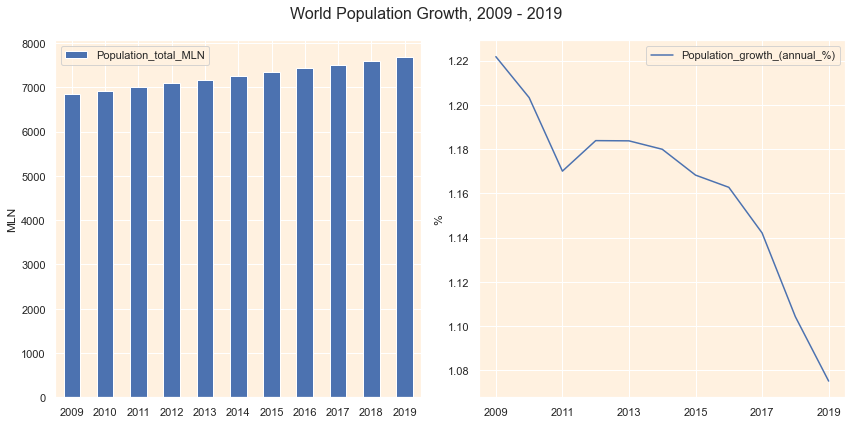

In [19]:
### World population and population growth
plt.rcParams['axes.facecolor'] = '#FFF1E0'

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f"World Population Growth, {start} - {end}", fontsize=16)


population[population['country']=='World'].sort_values('year').\
    plot(kind='bar', x='year', y='Population_total_MLN', 
         ax=ax1, xlabel='', ylabel='MLN', rot=0)

population[population['country']=='World'].sort_values('year').\
    plot(kind='line', x='year', y='Population_growth_(annual_%)', 
         ax=ax2, xlabel ='', ylabel='%', rot=0, grid=True)

plt.tight_layout()
plt.show();

In [20]:
pop_change = (population[(population['country']=='World') & (population['year']==str(end))]['Population_total_MLN'].values[0] - 
 population[(population['country']=='World') & (population['year']==str(start))]['Population_total_MLN'].values[0])

pop_gr_change = (population[(population['country']=='World') & (population['year']==str(end))]['Population_growth_(annual_%)'].values[0] - 
 population[(population['country']=='World') & (population['year']==str(start))]['Population_growth_(annual_%)'].values[0])

print('-'*70)
print(f"""
For period {start} - {end}
World Population increased by {round(pop_change,0)} MLN,
Population growth rate increased by {round(pop_gr_change,5)} %.
""")
print('-'*70)

----------------------------------------------------------------------

For period 2009 - 2019
World Population increased by 834.0 MLN,
Population growth rate increased by -0.14654 %.

----------------------------------------------------------------------


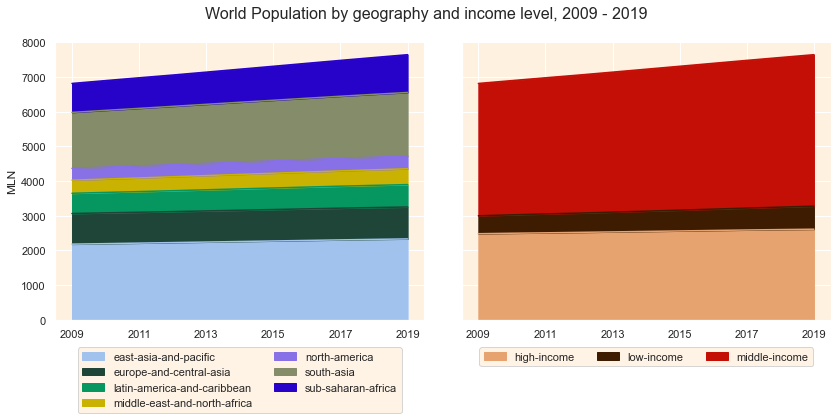

In [21]:
### World population by Geographical Region

region_colors = ['#a1c2ed','#1e4537','#06965f','#c9b202','#8870e6','#848c69','#2702c9'] # 7 geography
income_colors = ['#e6a370', '#3d1c02', '#c40f06'] # 3 income

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle(f"World Population by geography and income level, {start} - {end}", fontsize=16)


population[population['country']!='World'].\
    groupby(['year','region']).Population_total_MLN.sum().\
    unstack().plot.area(ax=ax1, xlabel='', ylabel='MLN', rot=0, color=region_colors)

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2)

population[population['country']!='World'].\
    groupby(['year','income_level']).Population_total_MLN.sum().\
    unstack().plot.area(ax=ax2, xlabel='', rot=0, color=income_colors)

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)

plt.tight_layout()
plt.show();

In [22]:
print('-'*70)
print(f'Country with highest annual population growth rate in {end}:')
print('')

df =  population[population['year']==str(end)].copy()
display(df[df['Population_growth_(annual_%)']==df['Population_growth_(annual_%)'].max()]\
            [['country', 'region','Population_growth_(annual_%)']])
print('')
print('-'*70)
print(f'Country with lowest annual population growth rate in {end}:')
print('')

df =  population[population['year']==str(end)].copy()
display(df[df['Population_growth_(annual_%)']==df['Population_growth_(annual_%)'].min()]\
            [['country', 'region','Population_growth_(annual_%)']])

----------------------------------------------------------------------
Country with highest annual population growth rate in 2019:



,country,region,Population_growth_(annual_%)
671,Bahrain,middle-east-and-north-africa,4.469239



----------------------------------------------------------------------
Country with lowest annual population growth rate in 2019:



,country,region,Population_growth_(annual_%)
1936,Moldova,europe-and-central-asia,-1.674182


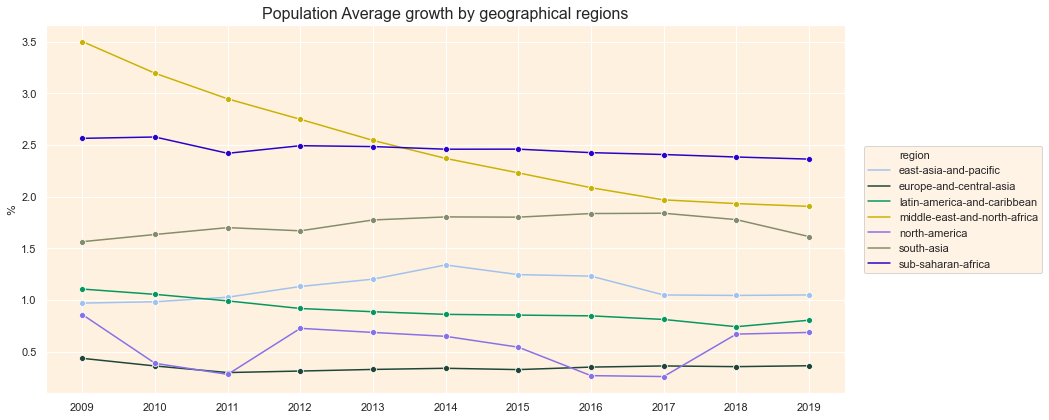

In [23]:
### Population growth by geographical region

fig = plt.figure(figsize=(12,6))

sns.lineplot(x = 'year', 
             y = 'Population_growth_(annual_%)', 
             hue = 'region', 
             data = population.groupby(['year','region'])['Population_growth_(annual_%)'].mean().reset_index(), 
             marker='o', palette=region_colors)

#plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.gca().get_legend().remove()
plt.xlabel('')
plt.ylabel('%')
plt.title("Population Average growth by geographical regions", fontsize=16)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

In [24]:
print('-'*70)
print('Most striking decline in growth rate occured in the Middle East & North Africa')
print('-'*70)

----------------------------------------------------------------------
Most striking decline in growth rate occured in the Middle East & North Africa
----------------------------------------------------------------------


In [25]:
print('')
print(f'Statistical summary of population growth in MENA region for period {start} - {end}')
print('-'*70)
population[population['region']=='middle-east-and-north-africa']['Population_growth_(annual_%)'].describe()


Statistical summary of population growth in MENA region for period 2009 - 2019
----------------------------------------------------------------------


count    231.000000
mean       2.493422
std        2.221307
min       -4.536565
25%        1.355567
50%        2.033592
75%        2.998202
max       14.144634
Name: Population_growth_(annual_%), dtype: float64

In [26]:
### countries with population growth rate below 0%
print('-'*70)
print('Min growth rate is nagative -4.53..%')
print('')

population[(population['region']=='middle-east-and-north-africa') & 
           (population['Population_growth_(annual_%)'] < 0)]\
            [['year','country','Population_total_MLN', 'Population_growth_(annual_%)']].\
            sort_values('year').\
            style.apply(highlight_min, subset=['Population_growth_(annual_%)'])

----------------------------------------------------------------------
Min growth rate is nagative -4.53..%



,year,country,Population_total_MLN,Population_growth_(annual_%)
2604,2011,Syrian Arab Republic,21.082966,-1.317299
2603,2012,Syrian Arab Republic,20.442541,-3.084734
2602,2013,Syrian Arab Republic,19.584274,-4.289118
2601,2014,Syrian Arab Republic,18.715672,-4.536565
2600,2015,Syrian Arab Republic,17.997408,-3.913350
2599,2016,Syrian Arab Republic,17.453933,-3.066274
2598,2017,Syrian Arab Republic,17.068002,-2.235953
2597,2018,Syrian Arab Republic,16.906283,-0.952015


In [27]:
print('-'*70)
print('Syrian Arab Republic suffered negative population growth rate during 2011-2018,\nthe beginning of the civil war 2011-present.')
print('-'*70)

----------------------------------------------------------------------
Syrian Arab Republic suffered negative population growth rate during 2011-2018,
the beginning of the civil war 2011-present.
----------------------------------------------------------------------


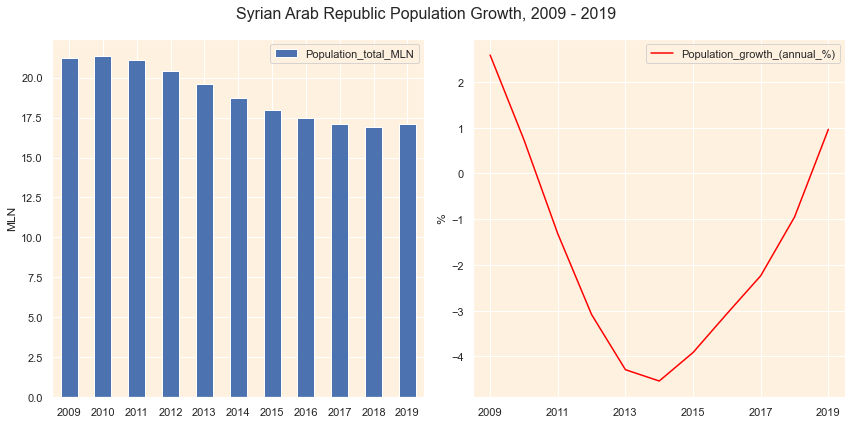

In [28]:
### Syrian Arab Republic population and population growth

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f"Syrian Arab Republic Population Growth, {start} - {end}", fontsize=16)


population[population['country']=='Syrian Arab Republic'].sort_values('year').\
    plot(kind='bar', x='year', y='Population_total_MLN', 
         ax=ax1, xlabel='', ylabel='MLN', rot=0)

population[population['country']=='Syrian Arab Republic'].sort_values('year').\
    plot(kind='line', x='year', y='Population_growth_(annual_%)', 
         ax=ax2, xlabel ='', ylabel='%', rot=0, grid=True, color='red')

plt.tight_layout()
plt.show();

In [29]:
### countries with population growth rate above 5%
print('-'*70)
print('Max growth rate is  14.14..%')
print('')


population[(population['region']=='middle-east-and-north-africa') & 
           (population['Population_growth_(annual_%)'] > 5)]\
            [['year','country','Population_total_MLN', 'Population_growth_(annual_%)']].\
            sort_values(['year']).\
            style.apply(highlight_max, subset=['Population_total_MLN', 'Population_growth_(annual_%)'])

----------------------------------------------------------------------
Max growth rate is  14.14..%



,year,country,Population_total_MLN,Population_growth_(annual_%)
681,2009,Bahrain,1.185076,6.127453
2276,2009,Qatar,1.654950,14.144634
1693,2009,Kuwait,2.821045,6.028276
1616,2009,Jordan,6.893260,5.009055
2771,2009,United Arab Emirates,7.917372,11.044635
2275,2010,Qatar,1.856327,11.482901
1692,2010,Kuwait,2.991884,5.879591
2154,2010,Oman,3.041434,5.586400
2770,2010,United Arab Emirates,8.549988,7.687055
1615,2010,Jordan,7.261539,5.204767


----------------------------------------------------------------------

Gulf countries and Lebanon had population growth rates above 5% during the study period,
with Qatar having the highest 14+ % growth in 2009, followed by sharp decline to 2-% in 2019,
perhaps due to decline in increase of expat population following 2008-2009 financial crisis.




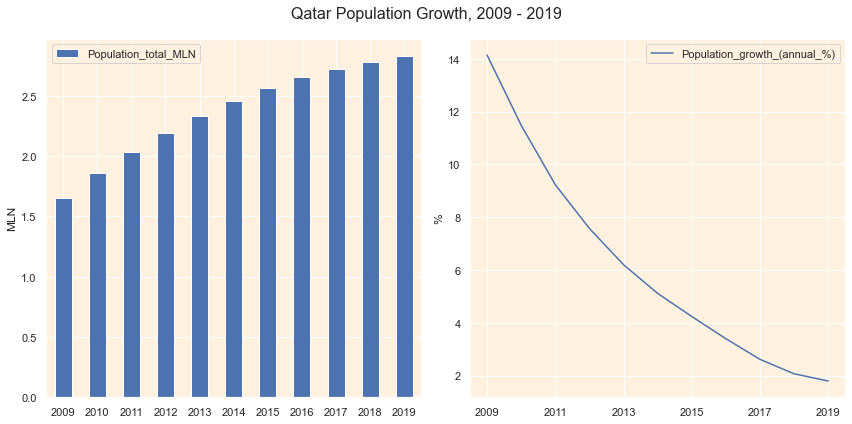

In [30]:
### Qatar population and population growth

print('-'*70)
print("""
Gulf countries and Lebanon had population growth rates above 5% during the study period,
with Qatar having the highest 14+ % growth in 2009, followed by sharp decline to 2-% in 2019,
perhaps due to decline in increase of expat population following 2008-2009 financial crisis.
""")
print('')


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f"Qatar Population Growth, {start} - {end}", fontsize=16)


population[population['country']=='Qatar'].sort_values('year').\
    plot(kind='bar', x='year', y='Population_total_MLN', 
         ax=ax1, xlabel='', ylabel='MLN', rot=0)

population[population['country']=='Qatar'].sort_values('year').\
    plot(kind='line', x='year', y='Population_growth_(annual_%)', 
         ax=ax2, xlabel ='', ylabel='%', rot=0, grid=True)

plt.tight_layout()
plt.show();

----------------------------------------------------------------------

Similar trend occured in United Arab Emirates




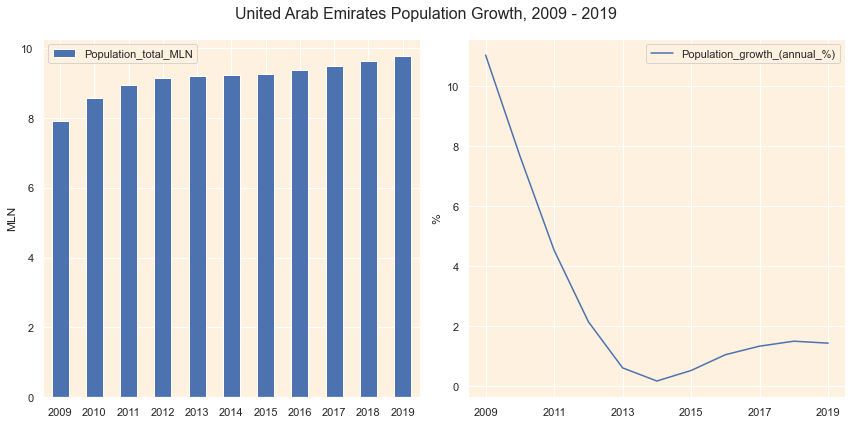

In [31]:
### United Arab Emirates

print('-'*70)
print("""
Similar trend occured in United Arab Emirates
""")
print('')


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f"United Arab Emirates Population Growth, {start} - {end}", fontsize=16)


population[population['country']=='United Arab Emirates'].sort_values('year').\
    plot(kind='bar', x='year', y='Population_total_MLN', 
         ax=ax1, xlabel='', ylabel='MLN', rot=0)

population[population['country']=='United Arab Emirates'].sort_values('year').\
    plot(kind='line', x='year', y='Population_growth_(annual_%)', 
         ax=ax2, xlabel ='', ylabel='%', rot=0, grid=True)

plt.tight_layout()
plt.show();

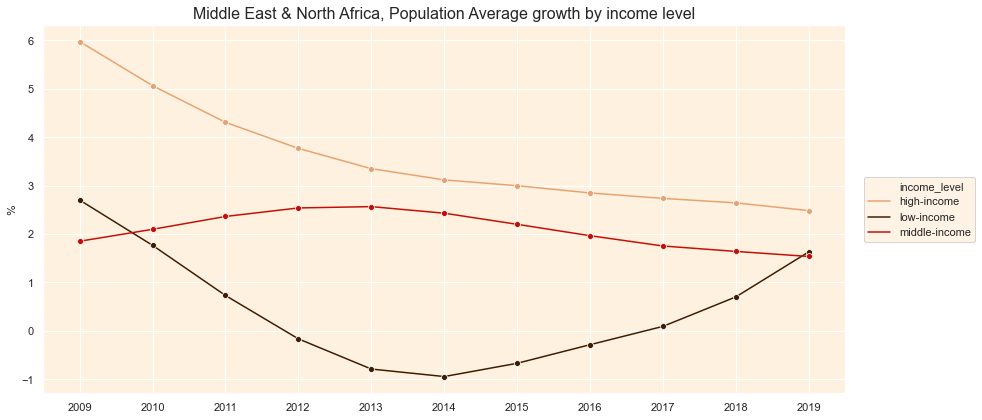

In [32]:
### Population growth by income_level
fig = plt.figure(figsize=(12,6))

sns.lineplot(x = 'year', 
             y = 'Population_growth_(annual_%)', 
             hue = 'income_level', 
             data = population[population['region']=='middle-east-and-north-africa'].\
             groupby(['year','income_level'])['Population_growth_(annual_%)'].mean().reset_index(), 
             marker='o', palette=income_colors)

plt.gca().get_legend().remove()
plt.xlabel('')
plt.ylabel('%')
plt.title("Middle East & North Africa, Population Average growth by income level", fontsize=16)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

In [33]:
### countries with population growth rates between 2 and 3 %  and high income
print('-'*70)
print('High-Income Countries/periods with average growth rates 2-3%')
print('')
print('')

population[(population['region']=='middle-east-and-north-africa') & 
           (population['Population_growth_(annual_%)'] > 2) & 
           (population['Population_growth_(annual_%)'] < 3) & 
           (population['income_level']=='high-income')]\
            [['year','country','Population_total_MLN', 'Population_growth_(annual_%)']].\
            sort_values(['year']).\
            style.apply(highlight_max, subset=['Population_total_MLN', 'Population_growth_(annual_%)'])

----------------------------------------------------------------------
High-Income Countries/periods with average growth rates 2-3%




,year,country,Population_total_MLN,Population_growth_(annual_%)
1572,2009,Israel,7.485600,2.390207
2353,2009,Saudi Arabia,26.630303,2.824934
2352,2010,Saudi Arabia,27.421461,2.927618
679,2011,Bahrain,1.278151,2.960981
2768,2012,United Arab Emirates,9.141596,2.154163
2348,2014,Saudi Arabia,30.916994,2.835955
2347,2015,Saudi Arabia,31.717667,2.556784
675,2015,Bahrain,1.371851,2.642471
1874,2015,Malta,0.445053,2.386395
2346,2016,Saudi Arabia,32.442572,2.259767


#### Most and least populous countries as of recent

In [34]:
### most recent year
recent_year = population.year.max()
population_recent = population[population['year']==recent_year].copy()
population_recent[['country','region', 'Population_total_MLN', 'Population_growth_(annual_%)']].\
    sort_values('Population_total_MLN').dropna()

,country,region,Population_total_MLN,Population_growth_(annual_%)
2728,Tuvalu,east-asia-and-pacific,0.011646,1.192033
2024,Nauru,east-asia-and-pacific,0.012581,-0.972917
2167,Palau,east-asia-and-pacific,0.018008,0.562441
814,British Virgin Islands,latin-america-and-caribbean,0.030030,0.762138
1342,Gibraltar,europe-and-central-asia,0.033701,-0.050431
...,...,...,...,...
2156,Pakistan,south-asia,216.565318,2.029215
1507,Indonesia,east-asia-and-pacific,270.625568,1.100585
2783,United States,north-america,328.239523,0.473954
1496,India,south-asia,1366.417754,1.015106


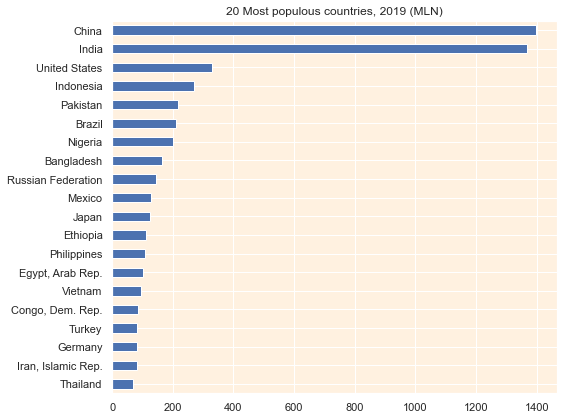

In [35]:
population_recent[population_recent['country']!='World']\
    [['country', 'Population_total_MLN']].\
    nlargest(20,'Population_total_MLN').\
    sort_values('Population_total_MLN', ascending=True).\
    plot(kind='barh', figsize = (8,6),
         x = 'country', y = 'Population_total_MLN', 
         xlabel='', title=f"20 Most populous countries, {recent_year} (MLN)", 
         legend='')
plt.tight_layout()
plt.show();

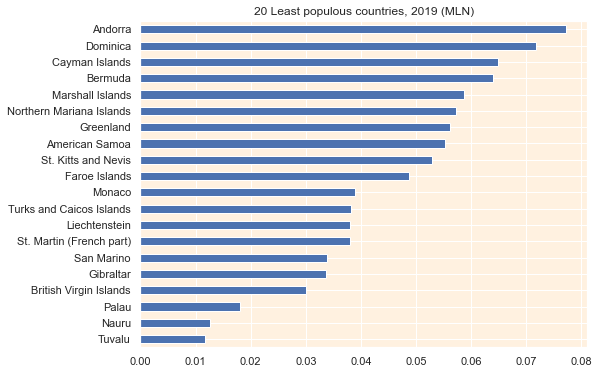

In [36]:
population_recent[population_recent['country']!='World'][['country', 'Population_total_MLN']].\
    nsmallest(20,'Population_total_MLN').sort_values('Population_total_MLN', ascending=True).\
    plot(kind='barh', figsize = (8,6),
         x = 'country', y = 'Population_total_MLN', 
         xlabel='', title=f"20 Least populous countries, {recent_year} (MLN)", 
         legend='')
plt.show();

#### Population by gender

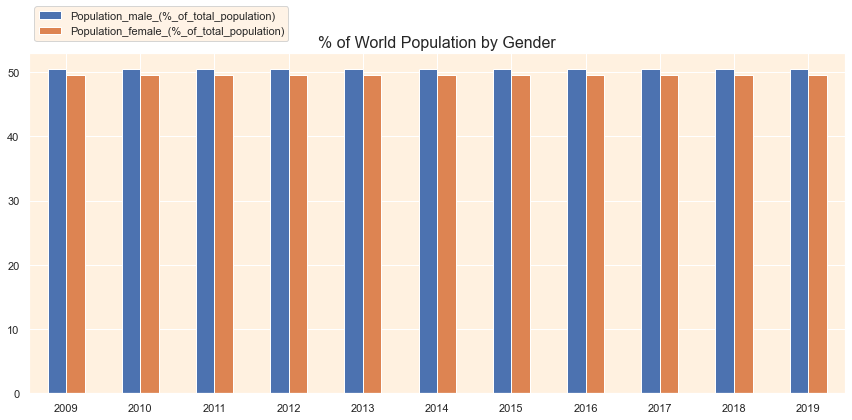

In [37]:
population[population['country']=='World']\
    [['year', 'Population_male_(%_of_total_population)', 
      'Population_female_(%_of_total_population)']].\
    sort_values('year').\
    plot(kind='bar', x='year', figsize=(12,6), rot=0, 
         xlabel='')

plt.gca().legend(loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=1)
plt.title("% of World Population by Gender", fontsize=16)
plt.tight_layout()
plt.show();

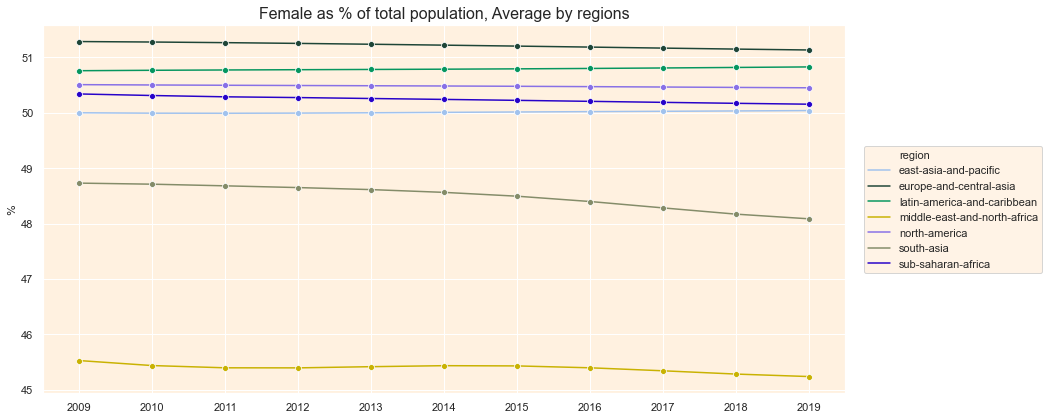

In [38]:
### % of female population by region

fig = plt.figure(figsize=(12,6))

sns.lineplot(x = 'year', 
             y = 'Population_female_(%_of_total_population)', 
             hue = 'region', 
             data = population.groupby(['year','region'])['Population_female_(%_of_total_population)'].mean().reset_index(), 
             marker='o', palette=region_colors)

#plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
plt.gca().get_legend().remove()
plt.xlabel('')
plt.ylabel('%')
plt.title("Female as % of total population, Average by regions", fontsize=16)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

In [39]:
print('-'*70)
print('')
print('Two regions stand out for low % of Female populatin: MENA and South Asia')
print('-'*70)

----------------------------------------------------------------------

Two regions stand out for low % of Female populatin: MENA and South Asia
----------------------------------------------------------------------


In [40]:
print('-'*70)
print("Statistical summary, % of female population for South-Asia")
print('')
population[population['region']=='south-asia']['Population_female_(%_of_total_population)'].describe()

----------------------------------------------------------------------
Statistical summary, % of female population for South-Asia



count    88.000000
mean     48.487914
std       3.466564
min      36.704856
25%      47.845370
50%      48.569125
75%      49.674029
max      54.564823
Name: Population_female_(%_of_total_population), dtype: float64

In [41]:
print('-'*70)
print('Min % is  36.7..%')
print('')


population[(population['region']=='south-asia') & 
           (population['Population_female_(%_of_total_population)'] < 45)]\
            [['year','country','Population_female_(%_of_total_population)']].\
            sort_values(['year']).\
            style.apply(highlight_min, subset=['Population_female_(%_of_total_population)'])

----------------------------------------------------------------------
Min % is  36.7..%



,year,country,Population_female_(%_of_total_population)
1856,2011,Maldives,44.743530
1855,2012,Maldives,43.702279
1854,2013,Maldives,42.591051
1853,2014,Maldives,41.457135
1852,2015,Maldives,40.347626
1851,2016,Maldives,39.235550
1850,2017,Maldives,38.159904
1849,2018,Maldives,37.264981
1848,2019,Maldives,36.704856


----------------------------------------------------------------------

Maldives is the country with the lowest % of female population in South Asia, which is apprently declines further.
Maldives also suffered sharp population growth rate decline in past 5 years:




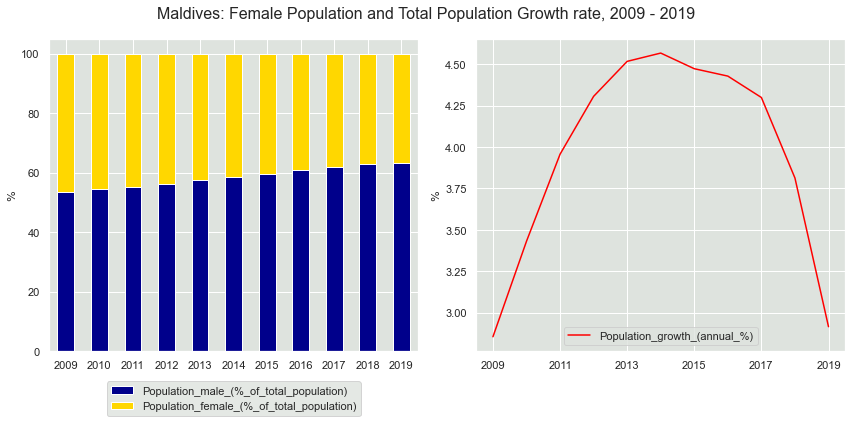

In [42]:
### Maldives

print('-'*70)
print("""
Maldives is the country with the lowest % of female population in South Asia, which is apprently declines further.
Maldives also suffered sharp population growth rate decline in past 5 years:
""")
print('')

plt.rcParams['axes.facecolor'] = '#dee3de'

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f"Maldives: Female Population and Total Population Growth rate, {start} - {end}", fontsize=16)

population[population['country']=='Maldives'].sort_values('year')\
    [['year','Population_male_(%_of_total_population)', 'Population_female_(%_of_total_population)']].\
    plot(kind='bar', stacked=True,
         x='year', ax=ax1, xlabel='', 
         ylabel='%', rot=0, color=['darkblue','gold'])

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=1)

population[population['country']=='Maldives'].sort_values('year').\
    plot(kind='line', x='year', y='Population_growth_(annual_%)', 
         ax=ax2, xlabel ='', ylabel='%', rot=0, grid=True, color='red')

plt.tight_layout()
plt.show();

In [43]:
print('-'*70)
print("Statistical summary, % of female population for MENA")
print('')
population[population['region']=='middle-east-and-north-africa']['Population_female_(%_of_total_population)'].describe()

----------------------------------------------------------------------
Statistical summary, % of female population for MENA



count    231.000000
mean      45.390768
std        7.573904
min       23.289054
25%       42.793675
50%       49.420705
75%       49.602758
max       50.703216
Name: Population_female_(%_of_total_population), dtype: float64

In [44]:
print('-'*70)
print('Min % is  23.2..%')
print('')


population[(population['region']=='middle-east-and-north-africa') & 
           (population['Population_female_(%_of_total_population)'] < 25)]\
            [['year','country','Population_female_(%_of_total_population)']].\
            sort_values(['year']).\
            style.apply(highlight_min, subset=['Population_female_(%_of_total_population)'])

----------------------------------------------------------------------
Min % is  23.2..%



,year,country,Population_female_(%_of_total_population)
2276,2009,Qatar,24.252422
2275,2010,Qatar,23.543240
2274,2011,Qatar,23.289054
2273,2012,Qatar,23.326630
2272,2013,Qatar,23.530469
2271,2014,Qatar,23.775721
2270,2015,Qatar,23.989441
2269,2016,Qatar,24.166067
2268,2017,Qatar,24.332566
2267,2018,Qatar,24.495287


----------------------------------------------------------------------
Most of Gulf countries have female population around 45% of total population



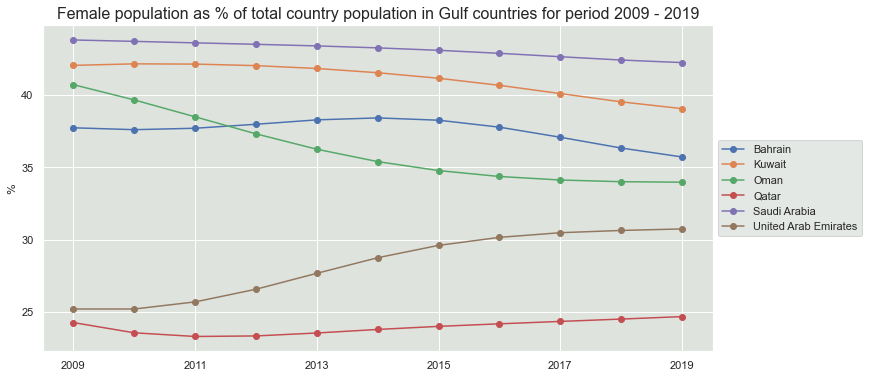

In [45]:
print('-'*70)
print('Most of Gulf countries have female population around 45% of total population')
print('')


#population[(population['region']=='middle-east-and-north-africa') & 
           #(population['Population_female_(%_of_total_population)'] < 46)]\
            #[['year','country','Population_female_(%_of_total_population)']].\
            #sort_values(['Population_female_(%_of_total_population)']).\
            #style.apply(highlight_min, subset=['Population_female_(%_of_total_population)'])


population[(population['region']=='middle-east-and-north-africa') & 
           (population['Population_female_(%_of_total_population)'] < 46)]\
            [['year','country','Population_female_(%_of_total_population)']].\
            sort_values(['year']).\
            pivot(index='year', columns='country', values='Population_female_(%_of_total_population)').\
            plot(figsize=(12,6), marker = 'o', xlabel='', ylabel='%')

plt.title(f"Female population as % of total country population in Gulf countries for period {start} - {end}", fontsize=16)
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show();

#### Summary for a Country population

In [46]:
def country_pop(country):
    
    print("-"*70)
    
    region = population[population['country'] == country][['region']].values[0]
    income_level = population[population['country'] == country][['income_level']].values[0]
    recent_pop = population[(population['country'] == country)
                            & (population['year'] == str(end))][['Population_total_MLN']].values[0]
    
    print(f"""{country} 
    Region: {region[0]}
    Income level: {income_level[0]}
    Population in {end}: {recent_pop[0]} MLN
    """)

    print("-"*70)
    
    fig = plt.figure(figsize=(12,6))
    ax = plt.subplot(121)

    population[population['country'] == country].\
        sort_values('year').plot(kind='bar', 
                                 x='year', 
                                 y='Population_total_MLN',
                                 ax=ax, 
                                 xlabel='', 
                                 ylabel='MLN', 
                                 title=f"{country} Population (MLN) and Population Growth (%)")    

    population[population['country'] == country].\
        sort_values('year').plot(x='year', 
                                 y='Population_growth_(annual_%)',
                                 ax=ax, xlabel='',
                                 secondary_y=True, 
                                 color='black')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08))


    ax = plt.subplot(122)
    population[population['country']==country]\
        [['year', 'Population_male_(%_of_total_population)', 
          'Population_female_(%_of_total_population)']].\
        sort_values('year').plot(kind='bar', 
                                 x='year', 
                                 rot=0, 
                                 xlabel='', 
                                 title=f'{country} % of Population by Gender',
                                 color=['darkblue','gold'],
                                 ax=ax)
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=1)

    plt.tight_layout()
    return plt.show()    

----------------------------------------------------------------------
United Kingdom 
    Region: europe-and-central-asia
    Income level: high-income
    Population in 2019: 66.836327 MLN
    
----------------------------------------------------------------------


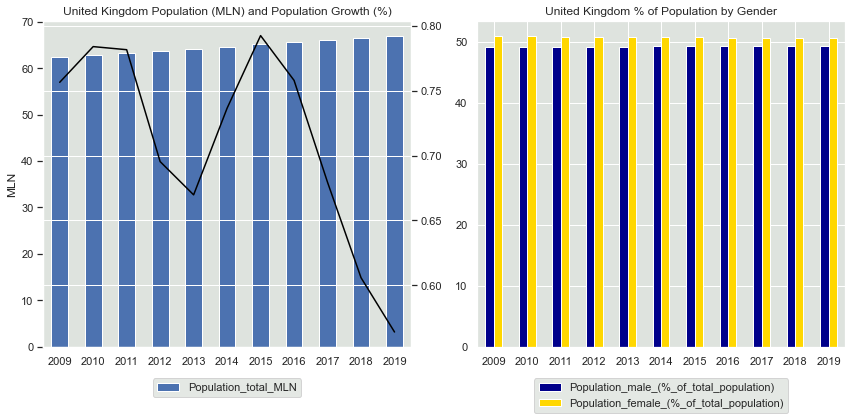

In [47]:
country_pop("United Kingdom")

In [51]:
#!jupyter nbconvert --to  html_toc --TemplateExporter.exclude_input=True Population.ipynb